    Chapter 18  Inheritance

__The language feature most often associated with object-oriented programming is inheritance.__ Inheritance is the ability to define a new class that is a modified version of an existing class. In this chapter I demonstrate inheritance using classes that represent playing cards, decks of cards, and poker hands.

If you don’t play poker, you can read about it at http://en.wikipedia.org/wiki/Poker, but you don’t have to; I’ll tell you what you need to know for the exercises.

Code examples from this chapter are available from http://thinkpython2.com/code/Card.py.

18.1  Card objects
There are fifty-two cards in a deck, each of which belongs to one of four suits and one of thirteen ranks. The suits are Spades, Hearts, Diamonds, and Clubs (in descending order in bridge). The ranks are Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King. Depending on the game that you are playing, an Ace may be higher than King or lower than 2.

If we want to define a new object to represent a playing card, it is obvious what the attributes should be: rank and suit. It is not as obvious what type the attributes should be. One possibility is to use strings containing words like 'Spade' for suits and 'Queen' for ranks. One problem with this implementation is that it would not be easy to compare cards to see which had a higher rank or suit.

An alternative is to use integers to encode the ranks and suits. In this context, “encode” means that we are going to define a mapping between numbers and suits, or between numbers and ranks. This kind of encoding is not meant to be a secret (that would be “encryption”).

For example, this table shows the suits and the corresponding integer codes:

__Spades	↦	3__

__Hearts	↦	2__

__Diamonds	↦	1__


__Clubs	↦	0__

This code makes it easy to compare cards; because higher suits map to higher numbers, we can compare suits by comparing their codes.

The mapping for ranks is fairly obvious; each of the numerical ranks maps to the corresponding integer, and for face cards:

__Jack	↦	11__

__Queen	↦	12__

__King	↦	13__

I am using the ↦ symbol to make it clear that these mappings are not part of the Python program. They are part of the program design, but they don’t appear explicitly in the code.

The class definition for Card looks like this:

In [1]:
class Card:
    """Represents a standard playing card.
    
    Attributes:
      suit: integer 0-3
      rank: integer 1-13
    """
# class attritubes are defined in class, not methods
    suit_names = ["Clubs", "Diamonds", "Hearts", "Spades"]
    rank_names = [None, "Ace", "2", "3", "4", "5", "6", "7", 
              "8", "9", "10", "Jack", "Queen", "King"]

    def __init__(self, suit=0, rank=2):
# so does this mean thie initial definition is suit = 0 ("Clubs") and rank = 2 ("2")?
        self.suit = suit
        self.rank = rank
        print(self)

    def __str__(self):
        """Returns a human-readable string representation."""
        return '%s of %s' % (Card.rank_names[self.rank],
                             Card.suit_names[self.suit])

    def __eq__(self, other):
        """Checks whether self and other have the same rank and suit.

        returns: boolean
        """
        return self.suit == other.suit and self.rank == other.rank

    def __lt__(self, other):
        """Compares this card to other, first by suit, then rank.

        returns: boolean
        """
        t1 = self.suit, self.rank
        t2 = other.suit, other.rank
        return t1 < t2

As usual, the init method takes an optional parameter for each attribute. The default card is the 2 of Clubs.

To create a Card, you call Card with the suit and rank of the card you want.

In [2]:
queen_of_diamonds = Card(1, 12)
print(queen_of_diamonds)
queen_of_diamonds

Queen of Diamonds
Queen of Diamonds


    18.2  Class attributes

In order to print Card objects in a way that people can easily read, we need a mapping from the integer codes to the corresponding ranks and suits. A natural way to do that is with lists of strings. We assign these lists to class attributes:

# inside class Card:

    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', 
              '8', '9', '10', 'Jack', 'Queen', 'King']

    def __str__(self):
        return '%s of %s' % (Card.rank_names[self.rank],
                             Card.suit_names[self.suit])

Variables like suit_names and rank_names, which are defined inside a class but outside of any method, are called class attributes because they are associated with the class object Card.

This term distinguishes them from variables like suit and rank, which are called instance attributes because they are associated with a particular instance.

Both kinds of attribute are accessed using dot notation. For example, in __str__, self is a Card object, and self.rank is its rank. Similarly, Card is a class object, and Card.rank_names is a list of strings associated with the class.

Every card has its own suit and rank, but there is only one copy of suit_names and rank_names.

Putting it all together, the expression Card.rank_names[self.rank] means “use the attribute rank from the object self as an index into the list rank_names from the class Card, and select the appropriate string.”

The first element of rank_names is None because there is no card with rank zero. By including None as a place-keeper, we get a mapping with the nice property that the index 2 maps to the string '2', and so on. To avoid this tweak, we could have used a dictionary instead of a list.

With the methods we have so far, we can create and print cards:

In [3]:
card1 = Card(2, 11)
print(card1)
card1

Jack of Hearts
Jack of Hearts


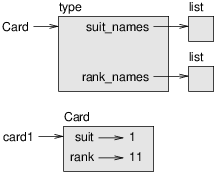

Figure 18.1 is a diagram of the Card class object and one Card instance. Card is a class object; its type is type. card1 is an instance of Card, so its type is Card. To save space, I didn’t draw the contents of suit_names and rank_names.

18.3  Comparing cards

For built-in types, there are relational operators (<, >, ==, etc.) that compare values and determine when one is greater than, less than, or equal to another. For programmer-defined types, we can override the behavior of the built-in operators by providing a method named __lt__, which stands for “less than”.

__lt__ takes two parameters, self and other, and returns True if self is strictly less than other.

The correct ordering for cards is not obvious. For example, which is better, the 3 of Clubs or the 2 of Diamonds? One has a higher rank, but the other has a higher suit. In order to compare cards, you have to decide whether rank or suit is more important.

The answer might depend on what game you are playing, but to keep things simple, we’ll make the arbitrary choice that suit is more important, so all of the Spades outrank all of the Diamonds, and so on.

With that decided, we can write __lt__:

# inside class Card:

    def __lt__(self, other):
        # check the suits
        if self.suit < other.suit: return True
        if self.suit > other.suit: return False

        # suits are the same... check ranks
        return self.rank < other.rank

You can write this more concisely using tuple comparison:

# inside class Card:

    def __lt__(self, other):
        t1 = self.suit, self.rank
        t2 = other.suit, other.rank
        return t1 < t2

As an exercise, write an __lt__ method for Time objects. You can use tuple comparison, but you also might consider comparing integers.

    18.4  Decks

Now that we have Cards, the next step is to define Decks. Since a deck is made up of cards, it is natural for each Deck to contain a list of cards as an attribute.

The following is a class definition for Deck. The init method creates the attribute cards and generates the standard set of fifty-two cards:

In [4]:
class Deck:
    """Represents a deck of cards.

    Attributes:
      cards: list of Card objects.
    """
    
    def __init__(self):
        """Initializes the Deck with 52 cards.
        """
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)

    def __str__(self):
        """Returns a string representation of the deck.
        """
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)

    def add_card(self, card):
        """Adds a card to the deck.

        card: Card
        """
        self.cards.append(card)

    def remove_card(self, card):
        """Removes a card from the deck or raises exception if it is not there.
        
        card: Card
        """
        self.cards.remove(card)

    def pop_card(self, i=-1):
        """Removes and returns a card from the deck.

        i: index of the card to pop; by default, pops the last card.
        """
        return self.cards.pop(i)

    def shuffle(self):
        """Shuffles the cards in this deck."""
        random.shuffle(self.cards)

    def sort(self):
        """Sorts the cards in ascending order."""
        self.cards.sort()

    def move_cards(self, hand, num):
        """Moves the given number of cards from the deck into the Hand.

        hand: destination Hand object
        num: integer number of cards to move
        """
        for i in range(num):
            hand.add_card(self.pop_card())

The easiest way to populate the deck is with a nested loop. The outer loop enumerates the suits from 0 to 3. The inner loop enumerates the ranks from 1 to 13. Each iteration creates a new Card with the current suit and rank, and appends it to self.cards.

18.5  Printing the deck

Here is a __str__ method for Deck:

# inside class Deck:

    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)
This method demonstrates an efficient way to accumulate a large string: building a list of strings and then using the string method join. The built-in function str invokes the __str__ method on each card and returns the string representation.

Since we invoke join on a newline character, the cards are separated by newlines. Here’s what the result looks like:

>>> deck = Deck()
>>> print(deck)
Ace of Clubs
2 of Clubs
3 of Clubs
...
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Even though the result appears on 52 lines, it is one long string that contains newlines.

18.6  Add, remove, shuffle and sort
To deal cards, we would like a method that removes a card from the deck and returns it. __The list method pop provides a convenient way to do that:__

    https://www.programiz.com/python-programming/methods/list/pop
__************************************************************************__

# inside class Deck:

    def pop_card(self):
        return self.cards.pop()

Since pop removes the last card in the list, we are dealing from the bottom of the deck.

To add a card, we can use the list method append:

    https://www.programiz.com/python-programming/methods/list/append
__************************************************************************__

# inside class Deck:

    def add_card(self, card):
        self.cards.append(card)

A method like this that uses another method without doing much work is sometimes called a veneer. The metaphor comes from woodworking, where a veneer is a thin layer of good quality wood glued to the surface of a cheaper piece of wood to improve the appearance.

__In this case add_card is a “thin” method that expresses a list operation in terms appropriate for decks. It improves the appearance, or interface, of the implementation.__

As another example, we can write a Deck method named shuffle using the function shuffle from the random module:

# inside class Deck:

            
    def shuffle(self):
        random.shuffle(self.cards)

__Don’t forget to import random.__

As an exercise, write a Deck method named sort that uses the list method sort to sort the cards in a Deck. sort uses the __lt__ method we defined to determine the order.

    18.7  Inheritance

__Inheritance is the ability to define a new class that is a modified version of an existing class.__ As an example, let’s say we want a class to represent a “hand”, that is, the cards held by one player. A hand is similar to a deck: both are made up of a collection of cards, and both require operations like adding and removing cards.

A hand is also different from a deck; there are operations we want for hands that don’t make sense for a deck. For example, in poker we might compare two hands to see which one wins. In bridge, we might compute a score for a hand in order to make a bid.

This relationship between classes—similar, but different—lends itself to inheritance. To define a new class that inherits from an existing class, you put the name of the existing class in parentheses:

In [5]:
class Hand(Deck):
    """Represents a hand of playing cards."""
    
    def __init__(self, label=''):
        self.cards = []
        self.label = label


def find_defining_class(obj, method_name):
    """Finds and returns the class object that will provide 
    the definition of method_name (as a string) if it is
    invoked on obj.

    obj: any python object
    method_name: string method name
    """
    for ty in type(obj).mro():
        if method_name in ty.__dict__:
            return ty
    return None

This definition indicates that Hand inherits from Deck; that means we can use methods like pop_card and add_card for Hands as well as Decks.

When a new class inherits from an existing one, the existing one is called the parent and the new class is called the child.

In this example, Hand inherits __init__ from Deck, but it doesn’t really do what we want: instead of populating the hand with 52 new cards, the init method for Hands should initialize cards with an empty list.

If we provide an init method in the Hand class, it overrides the one in the Deck class:

# inside class Hand:

    def __init__(self, label=''):
        self.cards = []
        self.label = label

   __When you create a Hand, Python invokes this init method, not the one in Deck.__

In [6]:
hand = Hand('new hand')
hand.cards

[]

In [7]:
hand.label

'new hand'

The other methods are inherited from Deck, so we can use pop_card and add_card to deal a card:

In [8]:
deck = Deck()
card = deck.pop_card()
hand.add_card(card)
print(hand)

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
King of Spades


A natural next step is to encapsulate this code in a method called move_cards:

# inside class Deck:

    def move_cards(self, hand, num):
        for i in range(num):
            hand.add_card(self.pop_card())

move_cards takes two arguments, a Hand object and the number of cards to deal. It modifies both self and hand, and returns None.

In some games, cards are moved from one hand to another, or from a hand back to the deck. You can use move_cards for any of these operations: self can be either a Deck or a Hand, and hand, despite the name, can also be a Deck.

Inheritance is a useful feature. Some programs that would be repetitive without inheritance can be written more elegantly with it. Inheritance can facilitate code reuse, since you can customize the behavior of parent classes without having to modify them. In some cases, the inheritance structure reflects the natural structure of the problem, which makes the design easier to understand.

On the other hand, inheritance can make programs difficult to read. When a method is invoked, it is sometimes not clear where to find its definition. The relevant code may be spread across several modules. Also, many of the things that can be done using inheritance can be done as well or better without it.

18.8  Class diagrams

So far we have seen stack diagrams, which show the state of a program, and object diagrams, which show the attributes of an object and their values. These diagrams represent a snapshot in the execution of a program, so they change as the program runs.

They are also highly detailed; for some purposes, too detailed. A class diagram is a more abstract representation of the structure of a program. Instead of showing individual objects, it shows classes and the relationships between them.

There are several kinds of relationship between classes:

Objects in one class might contain references to objects in another class. For example, each Rectangle contains a reference to a Point, and each Deck contains references to many Cards. This kind of relationship is called HAS-A, as in, “a Rectangle has a Point.”
One class might inherit from another. This relationship is called IS-A, as in, “a Hand is a kind of a Deck.”
One class might depend on another in the sense that objects in one class take objects in the second class as parameters, or use objects in the second class as part of a computation. This kind of relationship is called a dependency.

A class diagram is a graphical representation of these relationships. For example, Figure 18.2 shows the relationships between Card, Deck and Hand.

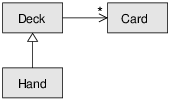

__The arrow with a hollow triangle head represents an IS-A relationship; in this case it indicates that Hand inherits from Deck.__

__The standard arrow head represents a HAS-A relationship; in this case a Deck has references to Card objects.__

__The star (*) near the arrow head is a multiplicity; it indicates how many Cards a Deck has. A multiplicity can be a simple number, like 52, a range, like 5..7 or a star, which indicates that a Deck can have any number of Cards.__

__There are no dependencies in this diagram. They would normally be shown with a dashed arrow. Or if there are a lot of dependencies, they are sometimes omitted.__

A more detailed diagram might show that a Deck actually contains a list of Cards, but built-in types like list and dict are usually not included in class diagrams.

    18.9  Debugging

Inheritance can make debugging difficult because when you invoke a method on an object, it might be hard to figure out which method will be invoked.

Suppose you are writing a function that works with Hand objects. You would like it to work with all kinds of Hands, like PokerHands, BridgeHands, etc. If you invoke a method like shuffle, you might get the one defined in Deck, but if any of the subclasses override this method, you’ll get that version instead. This behavior is usually a good thing, but it can be confusing.

Any time you are unsure about the flow of execution through your program, the simplest solution is to add print statements at the beginning of the relevant methods. If Deck.shuffle prints a message that says something like Running Deck.shuffle, then as the program runs it traces the flow of execution.

As an alternative, you could use this function, which takes an object and a method name (as a string) and returns the class that provides the definition of the method:

def find_defining_class(obj, meth_name):
    for ty in type(obj).mro():
        if meth_name in ty.__dict__:
            return ty
Here’s an example:

In [9]:
hand = Hand()
find_defining_class(hand, 'shuffle')

__main__.Deck

So the shuffle method for this Hand is the one in Deck.

__find_defining_class uses the mro method to get the list of class objects (types) that will be searched for methods. “MRO” stands for “method resolution order”, which is the sequence of classes Python searches to “resolve” a method name.__

__Here’s a design suggestion: when you override a method, the interface of the new method should be the same as the old. It should take the same parameters, return the same type, and obey the same preconditions and postconditions. If you follow this rule, you will find that any function designed to work with an instance of a parent class, like a Deck, will also work with instances of child classes like a Hand and PokerHand.__

__If you violate this rule, which is called the “Liskov substitution principle”, your code will collapse like (sorry) a house of cards.__

    18.10  Data encapsulation

__The previous chapters demonstrate a development plan we might call “object-oriented design”. We identified objects we needed—like Point, Rectangle and Time—and defined classes to represent them. In each case there is an obvious correspondence between the object and some entity in the real world (or at least a mathematical world).__

__But sometimes it is less obvious what objects you need and how they should interact. In that case you need a different development plan. In the same way that we discovered function interfaces by encapsulation and generalization, we can discover class interfaces by data encapsulation.__

__Markov analysis, from Section 13.8, provides a good example. If you download my code from http://thinkpython2.com/code/markov.py, you’ll see that it uses two global variables—suffix_map and prefix—that are read and written from several functions.__

suffix_map = {}        
prefix = ()            
__Because these variables are global, we can only run one analysis at a time. If we read two texts, their prefixes and suffixes would be added to the same data structures (which makes for some interesting generated text).__

__To run multiple analyses, and keep them separate, we can encapsulate the state of each analysis in an object. Here’s what that looks like:__

class Markov:

    def __init__(self):
        self.suffix_map = {}
        self.prefix = () 

  Next, we transform the functions into methods. For example, here’s process_word:

    def process_word(self, word, order=2):
        if len(self.prefix) < order:
            self.prefix += (word,)
            return

        try:
            self.suffix_map[self.prefix].append(word)
        except KeyError:
            # if there is no entry for this prefix, make one
            self.suffix_map[self.prefix] = [word]

        self.prefix = shift(self.prefix, word)        
Transforming a program like this—changing the design without changing the behavior—is another example of refactoring (see Section 4.7).

This example suggests a development plan for designing objects and methods:

Start by writing functions that read and write global variables (when necessary).
Once you get the program working, look for associations between global variables and the functions that use them.
Encapsulate related variables as attributes of an object.
Transform the associated functions into methods of the new class.
As an exercise, download my Markov code from http://thinkpython2.com/code/markov.py, and follow the steps described above to encapsulate the global variables as attributes of a new class called Markov. Solution: http://thinkpython2.com/code/markov2.py.

18.11  Glossary

encode:

To represent one set of values using another set of values by constructing a mapping between them.

class attribute:

An attribute associated with a class object. Class attributes are defined inside a class definition but outside any method.

instance attribute:

An attribute associated with an instance of a class.

veneer:

A method or function that provides a different interface to another function without doing much computation.

inheritance:

The ability to define a new class that is a modified version of a previously defined class.

parent class:

The class from which a child class inherits.

child class:

A new class created by inheriting from an existing class; also called a “subclass”.

IS-A relationship:

A relationship between a child class and its parent class.

HAS-A relationship:

A relationship between two classes where instances of one class contain references to instances of the other.

dependency:

A relationship between two classes where instances of one class use instances of the other class, but do not store them as attributes.

class diagram:

A diagram that shows the classes in a program and the relationships between them.

multiplicity:

A notation in a class diagram that shows, for a HAS-A relationship, how many references there are to instances of another class.

data encapsulation:

A program development plan that involves a prototype using global variables and a final version that makes the global variables into instance attributes.

18.12  Exercises

Exercise 1   For the following program, draw a UML class diagram that shows these classes and the relationships among them.
class PingPongParent:
    pass

class Ping(PingPongParent):
    def __init__(self, pong):
        self.pong = pong


class Pong(PingPongParent):
    def __init__(self, pings=None):
        if pings is None:
            self.pings = []
        else:
            self.pings = pings

    def add_ping(self, ping):
        self.pings.append(ping)

pong = Pong()
ping = Ping(pong)
pong.add_ping(ping)
Exercise 2   Write a Deck method called deal_hands that takes two parameters, the number of hands and the number of cards per hand. It should create the appropriate number of Hand objects, deal the appropriate number of cards per hand, and return a list of Hands.
Exercise 3  
The following are the possible hands in poker, in increasing order of value and decreasing order of probability:

pair:
two cards with the same rank
two pair:
two pairs of cards with the same rank
three of a kind:
three cards with the same rank
straight:
five cards with ranks in sequence (aces can be high or low, so Ace-2-3-4-5 is a straight and so is 10-Jack-Queen-King-Ace, but Queen-King-Ace-2-3 is not.)
flush:
five cards with the same suit
full house:
three cards with one rank, two cards with another
four of a kind:
four cards with the same rank
straight flush:
five cards in sequence (as defined above) and with the same suit
The goal of these exercises is to estimate the probability of drawing these various hands.

Download the following files from http://thinkpython2.com/code:
Card.py
: A complete version of the Card, Deck and Hand classes in this chapter.
PokerHand.py
: An incomplete implementation of a class that represents a poker hand, and some code that tests it.
If you run PokerHand.py, it deals seven 7-card poker hands and checks to see if any of them contains a flush. Read this code carefully before you go on.
Add methods to PokerHand.py named has_pair, has_twopair, etc. that return True or False according to whether or not the hand meets the relevant criteria. Your code should work correctly for “hands” that contain any number of cards (although 5 and 7 are the most common sizes).
Write a method named classify that figures out the highest-value classification for a hand and sets the label attribute accordingly. For example, a 7-card hand might contain a flush and a pair; it should be labeled “flush”.
When you are convinced that your classification methods are working, the next step is to estimate the probabilities of the various hands. Write a function in PokerHand.py that shuffles a deck of cards, divides it into hands, classifies the hands, and counts the number of times various classifications appear.
Print a table of the classifications and their probabilities. Run your program with larger and larger numbers of hands until the output values converge to a reasonable degree of accuracy. Compare your results to the values at http://en.wikipedia.org/wiki/Hand_rankings.
Solution: http://thinkpython2.com/code/PokerHandSoln.py.